In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import cv2

2024-05-14 11:47:48.879088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 11:47:49.053009: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 11:47:49.055379: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 11:47:49.856523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


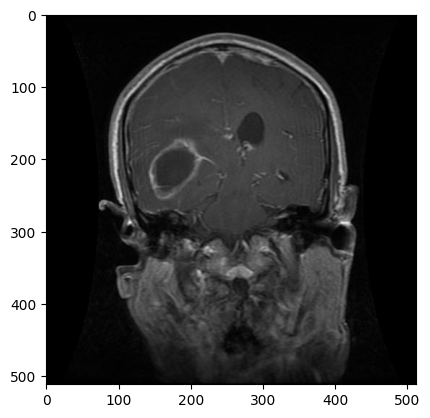

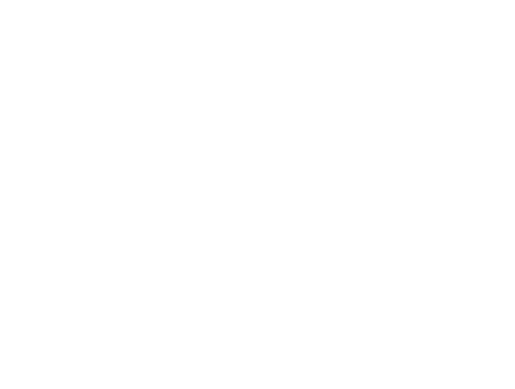

In [2]:
DATA = r"brain_dataset/Training" #reading the data
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES:
    path = os.path.join(DATA,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

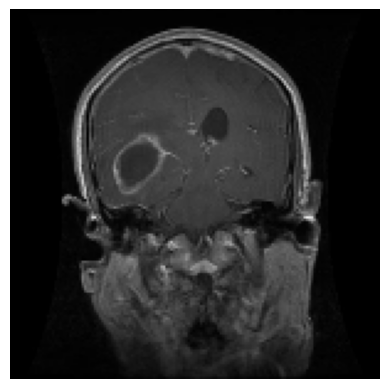

In [3]:
IMG_SIZE = 150 #defining our image size
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))#scaling down our images  
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [4]:
training_data = [] #manipulating our training data

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA,category)
        class_num = CATEGORIES.index(category) #defining the different categories of the images in our data
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
            except Exception as e:
                pass
create_training_data()

In [5]:
X = [] #used for storing  the features
y = [] #used for storing the labels
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)

(2870, 150, 150, 1)


In [6]:
from keras.utils.np_utils import to_categorical #one-hot eencoding our values
y = to_categorical(y, num_classes = 4)

In [7]:
from sklearn.model_selection import train_test_split #splitting the data into training and validaton set
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [8]:
#defining our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

2024-05-14 11:50:24.915290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 11:50:24.915757: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 128)       0

In [10]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))    

Epoch 1/50


/tmp/ipykernel_4299/2361167126.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
2024-05-14 11:50:44.869247: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


58/58 [==============================] - 73s 1s/step - loss: 1.3302 - accuracy: 0.3841 - val_loss: 1.1403 - val_accuracy: 0.4791
Epoch 2/50
58/58 [==============================] - 84s 1s/step - loss: 1.0386 - accuracy: 0.5553 - val_loss: 0.8661 - val_accuracy: 0.6115
Epoch 3/50
58/58 [==============================] - 106s 2s/step - loss: 0.8441 - accuracy: 0.6346 - val_loss: 0.7432 - val_accuracy: 0.6690
Epoch 4/50
58/58 [==============================] - 98s 2s/step - loss: 0.7246 - accuracy: 0.6956 - val_loss: 0.6869 - val_accuracy: 0.7404
Epoch 5/50
58/58 [==============================] - 98s 2s/step - loss: 0.6299 - accuracy: 0.7356 - val_loss: 0.5866 - val_accuracy: 0.7770
Epoch 6/50
58/58 [==============================] - 98s 2s/step - loss: 0.5819 - accuracy: 0.7687 - val_loss: 0.5243 - val_accuracy: 0.7892
Epoch 7/50
58/58 [==============================] - 99s 2s/step - loss: 0.5047 - accuracy: 0.8014 - val_loss: 0.5351 - val_accuracy: 0.7997
Epoch 8/50
58/58 [============

Text(0.5, 0, 'epoch')

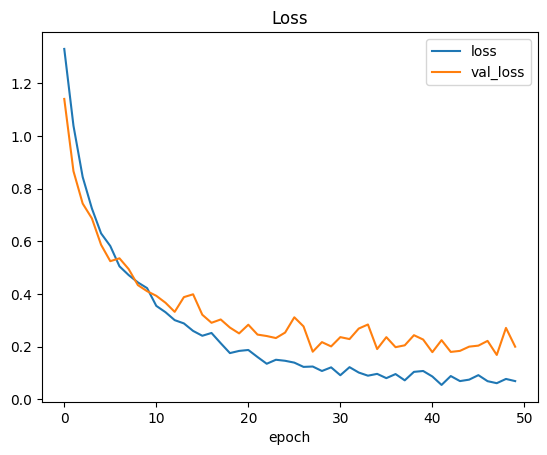

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

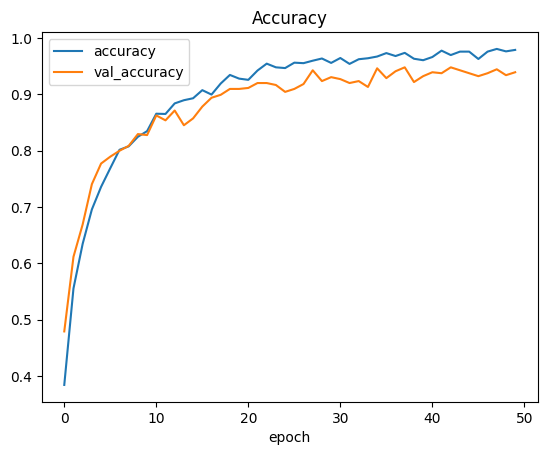

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [13]:
model.save('BrainTumor.h5')

In [15]:
import streamlit as st #importing streamlit and tensorflow
import tensorflow as tf
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten
import numpy as np
from PIL import Image ,ImageOps
